In [1]:
import pandas as pd
import time
import random
import math
import mmh3

# Teste com Dados Originais eliminando uma remessa

In [4]:
df1 = pd.read_csv("./DBLP.csv", sep=",", encoding="utf-8", keep_default_na=False)
df2 = pd.read_csv("./Scholar.csv", sep=",", encoding="utf-8", keep_default_na=False)
truth = pd.read_csv("truth.csv", sep=",", encoding="utf-8", keep_default_na=False)
truthD = dict()
for i, r in truth.iterrows():
    idDBLP = r["idDBLP"]
    idScholar = r["idScholar"]
    if idDBLP in truthD:
        ids = truthD[idDBLP]
        ids.append(idScholar)
    else:
        truthD[idDBLP] = [idScholar]

t = 0.5
TP = 5347
eps = 0.1
w = 1000
delta = 0.1
L = math.ceil(math.log(1 / delta) / (2 * (eps ** 2)))
eps = 0.01
L1 = int(1 / (2 * eps))
print("L=", L, "L1=", L1)
q = 2
dictB = [dict() for l in range(L)]
tp = 0
fp = 0
pairsNo = 0
nbS = 1
naS = 1
offsetA = 50
offsetB = 50
indices = [random.randint(0, L) for i in range(L1)]
blockingTime = 0
matchingTime = 0

def str_to_MinHash(str1, q, seed=0):
    return min([mmh3.hash(str1[i:i + q], seed) for i in range(len(str1) - q + 1)])

descarteFlag = 0 # esse é o valor que sera colocado junto com o id, seria a posiçaõ do elemento no array
elementos_para_descarte = 50 # esse é a quantidade de elementos que serão descartados

def elimina_elementos_dentro_dictB(array_para_descarte, elementos_para_descarte):
    # print(f"indice {elementos_para_descarte} para descarte e o array é {array_para_descarte}")
    indice = 0
    for (_, tempo_inserido) in array_para_descarte:
        if tempo_inserido < elementos_para_descarte:
            indice += 1
        else:
            del array_para_descarte[:indice]
            break

nova_estrutura = {}
# adicionar uma chave sendo uma tupla, onde o chave sera (chaveHashGerada, posição do bloco) pois, um a chave hash pode estar em mais de um bloco
# agora devo adicionar um array ao valor pois o primeiro valor sera a quantidade de descarte e o segundo array, sera a elementos_para_descarte

FileNotFoundError: [Errno 2] No such file or directory: './DBLP.csv'

In [3]:
while True:
    st = time.time()
    for index1 in range(naS, naS + offsetA):
        if index1 >= len(df1):
            break
        rr = df1.iloc[index1, 0:5]
        idDBLP = rr["id"]
        title = rr["title"]
        authors = rr["authors"]
        venue = rr["venue"]
        year = rr["year"]

        srec = title + " " + authors
        key = ""
        for l in range(L):
            key = str(str_to_MinHash(srec.lower(), 2, l))
            d = dictB[l]
            if key in d:
                ids = d[key]
                if len(ids) < w:
                    ids.append((idDBLP, descarteFlag))
                else:
                    qtd_descarte, elementoAtualParaDescarte = nova_estrutura[(key, l)]
                    # print(f'tupla({key}, {l}) e a qtd_descarte {qtd_descarte} eliminando até {elementoAtualParaDescarte}' )
                    elimina_elementos_dentro_dictB(ids, elementoAtualParaDescarte)
                    # ids.pop(0)
                    
                    nova_estrutura[(key, l)] = [qtd_descarte + 1, elementoAtualParaDescarte + 50]
                    ids.append((idDBLP, descarteFlag))
            else:
                d[key] = [(idDBLP, descarteFlag)]
                nova_estrutura[(key, l)] = [0, 50]
        descarteFlag += 1
    end = time.time()
    # blockingTime += (end - st)
    naS += offsetA

    if naS >= len(df1):
        break


NameError: name 'naS' is not defined

In [118]:
nova_estrutura

{('-2053413593', 0): [0, 50],
 ('-2133641798', 1): [1, 100],
 ('-2070745776', 2): [0, 50],
 ('-2145163738', 3): [0, 50],
 ('-2099805373', 4): [0, 50],
 ('-2013476183', 5): [0, 50],
 ('-2092373245', 6): [0, 50],
 ('-2025556504', 7): [0, 50],
 ('-2117495091', 8): [0, 50],
 ('-2123832401', 9): [0, 50],
 ('-2054819018', 10): [0, 50],
 ('-2080595683', 11): [0, 50],
 ('-2023351694', 12): [0, 50],
 ('-2074731222', 13): [0, 50],
 ('-1886976138', 14): [0, 50],
 ('-2146285327', 15): [0, 50],
 ('-1952114201', 16): [0, 50],
 ('-2065811062', 17): [0, 50],
 ('-2132248306', 18): [0, 50],
 ('-2065273364', 19): [0, 50],
 ('-2140351595', 20): [19, 1000],
 ('-2070167981', 21): [1, 100],
 ('-2135492907', 22): [0, 50],
 ('-2094392858', 23): [0, 50],
 ('-1752603705', 24): [0, 50],
 ('-1830022098', 25): [0, 50],
 ('-2147161876', 26): [0, 50],
 ('-2138069548', 27): [0, 50],
 ('-2104325302', 28): [0, 50],
 ('-2065682284', 29): [0, 50],
 ('-2073398869', 30): [0, 50],
 ('-1902674310', 31): [0, 50],
 ('-187330338

In [121]:
valores = nova_estrutura.values()
maior_valor = 0
for array2posicoes in valores:
    if array2posicoes[0] > maior_valor:
        maior_valor = array2posicoes[0]

In [153]:
valores = nova_estrutura.values()
plotar_valores = [ array2posicoes[0] for array2posicoes in valores if array2posicoes[0] > 0]
plotar_valores

[1,
 19,
 1,
 1,
 21,
 19,
 6,
 10,
 7,
 8,
 12,
 6,
 10,
 26,
 4,
 10,
 8,
 20,
 14,
 18,
 7,
 8,
 8,
 17,
 15,
 17,
 7,
 15,
 2,
 23,
 19,
 5,
 4,
 10,
 15,
 2,
 3,
 1,
 12]

In [157]:
len(plotar_valores)

39

In [123]:
nova_estrutura

{('-2053413593', 0): [0, 50],
 ('-2133641798', 1): [1, 100],
 ('-2070745776', 2): [0, 50],
 ('-2145163738', 3): [0, 50],
 ('-2099805373', 4): [0, 50],
 ('-2013476183', 5): [0, 50],
 ('-2092373245', 6): [0, 50],
 ('-2025556504', 7): [0, 50],
 ('-2117495091', 8): [0, 50],
 ('-2123832401', 9): [0, 50],
 ('-2054819018', 10): [0, 50],
 ('-2080595683', 11): [0, 50],
 ('-2023351694', 12): [0, 50],
 ('-2074731222', 13): [0, 50],
 ('-1886976138', 14): [0, 50],
 ('-2146285327', 15): [0, 50],
 ('-1952114201', 16): [0, 50],
 ('-2065811062', 17): [0, 50],
 ('-2132248306', 18): [0, 50],
 ('-2065273364', 19): [0, 50],
 ('-2140351595', 20): [19, 1000],
 ('-2070167981', 21): [1, 100],
 ('-2135492907', 22): [0, 50],
 ('-2094392858', 23): [0, 50],
 ('-1752603705', 24): [0, 50],
 ('-1830022098', 25): [0, 50],
 ('-2147161876', 26): [0, 50],
 ('-2138069548', 27): [0, 50],
 ('-2104325302', 28): [0, 50],
 ('-2065682284', 29): [0, 50],
 ('-2073398869', 30): [0, 50],
 ('-1902674310', 31): [0, 50],
 ('-187330338

In [122]:
maior_valor

26

In [125]:
dictB[115]['-2134634563']

[('conf/sigmod/MumickQM97', 1300),
 ('conf/sigmod/HoAMS97', 1301),
 ('conf/sigmod/TsueiPK97', 1305),
 ('conf/vldb/CareyKSSS00', 1306),
 ('conf/vldb/Schek00', 1308),
 ('conf/vldb/BernsteinHJRW00', 1309),
 ('conf/sigmod/YangM97', 1312),
 ('conf/sigmod/JajodiaSSB97', 1313),
 ('conf/sigmod/Kramer97', 1316),
 ('conf/vldb/ChakrabartiSST00', 1319),
 ('conf/sigmod/LivnyRBCDLMW97a', 1320),
 ('conf/vldb/BeneventanoBCCGMMV00', 1321),
 ('conf/sigmod/RafieiM97', 1323),
 ('conf/vldb/CarusoCGLM00', 1324),
 ('conf/sigmod/ChawatheG97', 1325),
 ('conf/vldb/DiligentiCLGG00', 1327),
 ('conf/sigmod/BrinMS97', 1328),
 ('conf/vldb/RisheYACLMVSV00', 1329),
 ('conf/sigmod/KornJF97', 1330),
 ('conf/sigmod/LivnyRBCDLMW97', 1331),
 ('conf/vldb/PedersenJD00', 1332),
 ('conf/vldb/GuPS00', 1333),
 ('conf/sigmod/PatelYKTNBHRLEKGDN97', 1334),
 ('conf/sigmod/GebhardtJJ97', 1335),
 ('conf/vldb/LabioYCGW00', 1336),
 ('conf/vldb/JarkeKL00', 1337),
 ('conf/sigmod/BozkayaO97', 1338),
 ('conf/vldb/HinneburgAK00', 1339),
 ('c

In [156]:
num_distinct_values = len(set(plotar_valores))
num_distinct_values

19

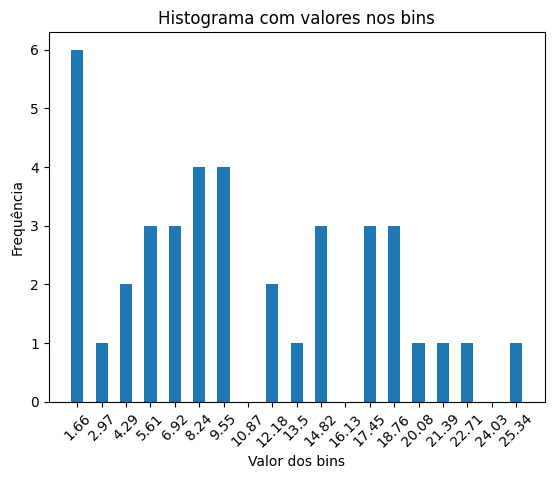

In [155]:
import matplotlib.pyplot as plt
import numpy as np

counts, bin_edges, _ = plt.hist(plotar_valores, bins=19, rwidth=0.5)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.xticks(bin_centers, labels=np.round(bin_centers, 2), rotation=45)

plt.xlabel("Valor dos bins")
plt.ylabel("Frequência")
plt.title("Histograma com valores nos bins")

# Exibir o gráfico
plt.show()


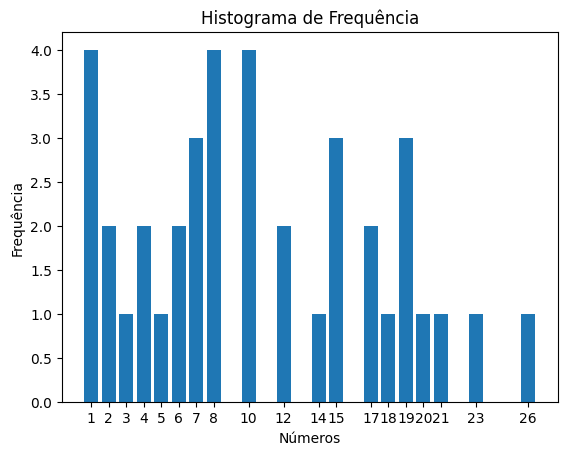

In [160]:
import matplotlib.pyplot as plt
from collections import Counter

# Lista de dados
data = [
    1, 19, 1, 1, 21, 19, 6, 10, 7, 8, 
    12, 6, 10, 26, 4, 10, 8, 20, 14, 
    18, 7, 8, 8, 17, 15, 17, 7, 15,
    2, 23, 19, 5, 4, 10, 15, 2, 3,
    1, 12
]

# Contar as ocorrências de cada número
count = Counter(data)

# Separar as chaves e valores
numbers = list(count.keys())
frequencies = list(count.values())

# Criar o histograma
plt.bar(numbers, frequencies)

# Adicionar título e rótulos
plt.title('Histograma de Frequência')
plt.xlabel('Números')
plt.ylabel('Frequência')

# Exibir o gráfico
plt.xticks(numbers) # Para garantir que todos os números sejam mostrados no eixo x
plt.show()


In [165]:
df1 = pd.read_csv("./DBLP.csv", sep=",", encoding="utf-8", keep_default_na=False)
df2 = pd.read_csv("./Scholar.csv", sep=",", encoding="utf-8", keep_default_na=False)
truth = pd.read_csv("truth.csv", sep=",", encoding="utf-8", keep_default_na=False)
truthD = dict()
for i, r in truth.iterrows():
    idDBLP = r["idDBLP"]
    idScholar = r["idScholar"]
    if idDBLP in truthD:
        ids = truthD[idDBLP]
        ids.append(idScholar)
    else:
        truthD[idDBLP] = [idScholar]

t = 0.5
TP = 5347
eps = 0.1
w = 1000
delta = 0.1
L = math.ceil(math.log(1 / delta) / (2 * (eps ** 2)))
eps = 0.01
L1 = int(1 / (2 * eps))
print("L=", L, "L1=", L1)
q = 2
dictB = [dict() for l in range(L)]
tp = 0
fp = 0
pairsNo = 0
nbS = 1
naS = 1
offsetA = 50
offsetB = 50
indices = [random.randint(0, L) for i in range(L1)]
blockingTime = 0
matchingTime = 0

def str_to_MinHash(str1, q, seed=0):
    return min([mmh3.hash(str1[i:i + q], seed) for i in range(len(str1) - q + 1)])

descarteFlag = 0 # esse é o valor que sera colocado junto com o id, seria a posiçaõ do elemento no array
elementos_para_descarte = 50 # esse é a quantidade de elementos que serão descartados

def elimina_elementos_dentro_dictB(array_para_descarte, elementos_para_descarte):
    print(f"indice {elementos_para_descarte} para descarte e o array é {array_para_descarte}")
    indice = 0
    for (_, tempo_inserido) in array_para_descarte:
        if tempo_inserido < elementos_para_descarte:
            indice += 1
        else:
            del array_para_descarte[:indice]
            break

nova_estrutura = {}
# adicionar uma chave sendo uma tupla, onde o chave sera (chaveHashGerada, posição do bloco) pois, um a chave hash pode estar em mais de um bloco
# agora devo adicionar um array ao valor pois o primeiro valor sera a quantidade de descarte e o segundo array, sera a elementos_para_descarte

L= 116 L1= 50


In [ ]:
while True:
    st = time.time()
    for index1 in range(naS, naS + offsetA):
        if index1 >= len(df1):
            break
        rr = df1.iloc[index1, 0:5]
        idDBLP = rr["id"]
        title = rr["title"]
        authors = rr["authors"]
        venue = rr["venue"]
        year = rr["year"]

        srec = title + " " + authors
        key = ""
        for l in range(L):
            key = str(str_to_MinHash(srec.lower(), 2, l))
            d = dictB[l]
            if key in d:
                ids = d[key]
                if len(ids) < w:
                    ids.append((idDBLP, descarteFlag))
                else:
                    
                    elimina_elementos_dentro_dictB(ids, elementos_para_descarte)
                    # ids.pop(0
                    elementos_para_descarte += 50
                    nova_estrutura[(key, l)] += 1
            else:
                d[key] = [(idDBLP, descarteFlag)]
                nova_estrutura[(key, l)] = 0
        descarteFlag += 1
    end = time.time()
    # blockingTime += (end - st)
    naS += offsetA

    if naS >= len(df1):
        break

indice 50 para descarte e o array é [('journals/sigmod/EisenbergM02', 0), ('conf/vldb/AmmannJR95', 1), ('journals/sigmod/Liu02', 2), ('conf/vldb/SubietaKL95', 5), ('journals/sigmod/BargaL02', 6), ('conf/vldb/MoserKK95', 8), ('conf/vldb/ChaudhuriGS95', 10), ('journals/sigmod/Kosch02', 11), ('conf/vldb/LuTD95', 12), ('conf/vldb/TreschPL95', 14), ('journals/sigmod/Geller02', 15), ('conf/vldb/MehtaD95', 16), ('journals/sigmod/CaplinskasEV02', 17), ('conf/vldb/SrikantA95', 18), ('conf/vldb/HaasNSS95', 19), ('conf/vldb/FlodinR95', 21), ('journals/sigmod/Kemper02', 22), ('conf/vldb/HvasshovdTBH95', 23), ('journals/sigmod/Kim02', 24), ('conf/vldb/GallersdorferN95', 27), ('journals/sigmod/CiliaB02', 28), ('journals/sigmod/HummerLW02', 29), ('conf/vldb/LometT95', 30), ('journals/sigmod/Winslett02a', 32), ('journals/sigmod/Camps02', 34), ('journals/sigmod/PourabbasR02', 37), ('conf/vldb/HoelS95', 38), ('journals/sigmod/Liu02a', 41), ('conf/vldb/LeslieJBY95', 42), ('journals/sigmod/CruzKLSWY02', 4

In [167]:
max(nova_estrutura.values())

26

In [171]:
valores = nova_estrutura.values()
plotar_valores = [ array2posicoes for array2posicoes in valores if array2posicoes > 0]
plotar_valores

[1,
 2,
 16,
 4,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 8,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 9,
 1,
 1,
 17,
 4,
 2,
 1,
 1,
 1,
 1,
 26,
 1,
 4,
 1]

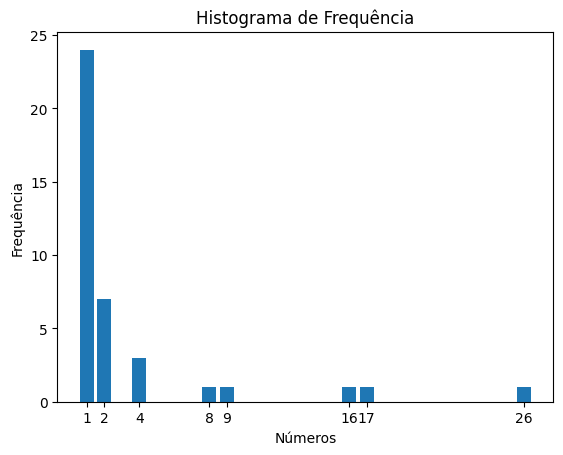

In [172]:
import matplotlib.pyplot as plt
from collections import Counter

# Contar as ocorrências de cada número
count = Counter(plotar_valores)

# Separar as chaves e valores
numbers = list(count.keys())
frequencies = list(count.values())

# Criar o histograma
plt.bar(numbers, frequencies)

# Adicionar título e rótulos
plt.title('Histograma de Frequência')
plt.xlabel('Números')
plt.ylabel('Frequência')

# Exibir o gráfico
plt.xticks(numbers) # Para garantir que todos os números sejam mostrados no eixo x
plt.show()

# analise da quantidade de descartes


In [97]:
nova_estrutura

{('-2053413593', 0): 0,
 ('-2133641798', 1): 1,
 ('-2070745776', 2): 0,
 ('-2145163738', 3): 0,
 ('-2099805373', 4): 0,
 ('-2013476183', 5): 0,
 ('-2092373245', 6): 0,
 ('-2025556504', 7): 0,
 ('-2117495091', 8): 0,
 ('-2123832401', 9): 0,
 ('-2054819018', 10): 0,
 ('-2080595683', 11): 0,
 ('-2023351694', 12): 0,
 ('-2074731222', 13): 0,
 ('-1886976138', 14): 0,
 ('-2146285327', 15): 0,
 ('-1952114201', 16): 0,
 ('-2065811062', 17): 0,
 ('-2132248306', 18): 0,
 ('-2065273364', 19): 0,
 ('-2140351595', 20): 2,
 ('-2070167981', 21): 16,
 ('-2135492907', 22): 0,
 ('-2094392858', 23): 0,
 ('-1752603705', 24): 0,
 ('-1830022098', 25): 0,
 ('-2147161876', 26): 0,
 ('-2138069548', 27): 0,
 ('-2104325302', 28): 0,
 ('-2065682284', 29): 0,
 ('-2073398869', 30): 0,
 ('-1902674310', 31): 0,
 ('-1873303389', 32): 0,
 ('-2138328710', 33): 4,
 ('-2021281974', 34): 0,
 ('-2132777999', 35): 0,
 ('-2079432241', 36): 0,
 ('-2056167884', 37): 0,
 ('-2127513926', 38): 0,
 ('-2133952482', 39): 0,
 ('-19689

In [104]:
print("quantidade máxima de vezes de descarte por bloco:", max(nova_estrutura.values()))

quantidade máxima de vezes de descarte por bloco: 850


In [105]:
maximo = max(nova_estrutura.values())
for key, value in nova_estrutura.items():
    if value == maximo:
        print("Bloco com mais descartes: ", key)

Bloco com mais descartes:  ('-2134634563', 115)


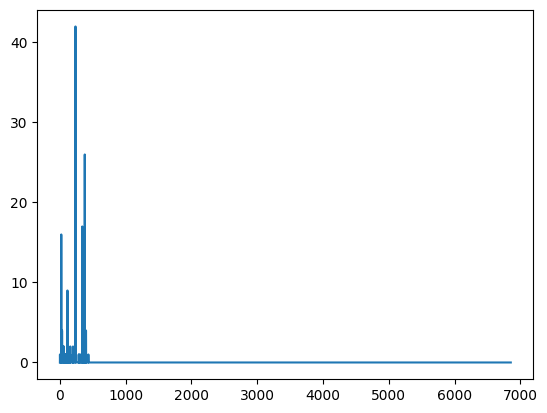

In [100]:
import matplotlib.pyplot as plt
plt.plot(nova_estrutura.values())

In [ ]:
# aqui é o dicionario eliminando de 50 em 50
dictB[28]['-2144211646']

[('conf/sigmod/AggarwalY00', 752),
 ('conf/sigmod/PalmerF00', 754),
 ('journals/sigmod/ShethGJRSWW96', 756),
 ('journals/sigmod/Sidell96', 757),
 ('conf/sigmod/LabioWGG00', 758),
 ('conf/sigmod/CatarciS01', 760),
 ('journals/sigmod/ZobelMR96', 761),
 ('conf/sigmod/NguyenACP01', 765),
 ('journals/sigmod/Widom96a', 766),
 ('conf/sigmod/ChoSG00', 767),
 ('journals/sigmod/MedskerCS95', 768),
 ('conf/sigmod/OhHP00', 769),
 ('journals/sigmod/Segev95', 770),
 ('journals/sigmod/DogacAOD95', 772),
 ('journals/sigmod/KarlapalemLS95', 773),
 ('conf/sigmod/SzalayGKT00', 774),
 ('conf/sigmod/GunopulosKTD00', 775),
 ('journals/sigmod/Chaudhri95', 777),
 ('conf/sigmod/AcharyaGP00', 778),
 ('journals/sigmod/JaegerF95', 780),
 ('conf/sigmod/WattezCBFF00', 781),
 ('journals/sigmod/BerraNT95', 782),
 ('conf/sigmod/RoySSB00', 787),
 ('journals/sigmod/Zhang95', 789),
 ('conf/sigmod/HellersteinA00', 790),
 ('journals/sigmod/KokkotosIPS95', 793),
 ('journals/sigmod/GamacheS95', 795),
 ('journals/sigmod/Dogac

In [106]:
# aqui é o dicionario eliminando de 1 em 1
dictB[115]['-2134634563']

[('conf/sigmod/Arpaci-DusseauACHP97', 1289),
 ('conf/vldb/CasatiS00', 1290),
 ('conf/vldb/Schnase00', 1291),
 ('conf/vldb/Bowker00', 1294),
 ('conf/sigmod/ZaharioudakisC97', 1295),
 ('conf/sigmod/ONeilQ97', 1297),
 ('conf/vldb/Brodie00', 1298),
 ('conf/vldb/Deshpande00', 1299),
 ('conf/sigmod/MumickQM97', 1300),
 ('conf/sigmod/HoAMS97', 1301),
 ('conf/sigmod/TsueiPK97', 1305),
 ('conf/vldb/CareyKSSS00', 1306),
 ('conf/vldb/Schek00', 1308),
 ('conf/vldb/BernsteinHJRW00', 1309),
 ('conf/sigmod/YangM97', 1312),
 ('conf/sigmod/JajodiaSSB97', 1313),
 ('conf/sigmod/Kramer97', 1316),
 ('conf/vldb/ChakrabartiSST00', 1319),
 ('conf/sigmod/LivnyRBCDLMW97a', 1320),
 ('conf/vldb/BeneventanoBCCGMMV00', 1321),
 ('conf/sigmod/RafieiM97', 1323),
 ('conf/vldb/CarusoCGLM00', 1324),
 ('conf/sigmod/ChawatheG97', 1325),
 ('conf/vldb/DiligentiCLGG00', 1327),
 ('conf/sigmod/BrinMS97', 1328),
 ('conf/vldb/RisheYACLMVSV00', 1329),
 ('conf/sigmod/KornJF97', 1330),
 ('conf/sigmod/LivnyRBCDLMW97', 1331),
 ('conf/

In [6]:
array_para_descarte = [('journals/sigmod/Ouksel02', 7), ('conf/vldb/TreschPL95', 14), ('journals/sigmod/Geller02', 15), ('conf/vldb/MehtaD95', 16), ('journals/sigmod/Aberer02', 20), ('journals/sigmod/Kemper02', 22), ('journals/sigmod/Winslett02a', 32), ('journals/sigmod/LuoI02', 45)]
elimina_elementos_dentro_dictB(array_para_descarte,17)
array_para_descarte

[('journals/sigmod/Aberer02', 20),
 ('journals/sigmod/Kemper02', 22),
 ('journals/sigmod/Winslett02a', 32),
 ('journals/sigmod/LuoI02', 45)]

# Teste com dado original, mas com janela deslizante

In [67]:
df1 = pd.read_csv("./DBLP.csv", sep=",", encoding="utf-8", keep_default_na=False)
df2 = pd.read_csv("./Scholar.csv", sep=",", encoding="utf-8", keep_default_na=False)
truth = pd.read_csv("truth.csv", sep=",", encoding="utf-8", keep_default_na=False)
truthD = dict()
for i, r in truth.iterrows():
    idDBLP = r["idDBLP"]
    idScholar = r["idScholar"]
    if idDBLP in truthD:
        ids = truthD[idDBLP]
        ids.append(idScholar)
    else:
        truthD[idDBLP] = [idScholar]

t = 0.5
TP = 5347
eps = 0.1
w = 1000
delta = 0.1
L = math.ceil(math.log(1 / delta) / (2 * (eps ** 2)))
eps = 0.01
L1 = int(1 / (2 * eps))
print("L=", L, "L1=", L1)
q = 2
dictB = [dict() for l in range(L)]
tp = 0
fp = 0
pairsNo = 0
nbS = 1
naS = 1
offsetA = 50
offsetB = 50
indices = [random.randint(0, L) for i in range(L1)]
blockingTime = 0
matchingTime = 0

def str_to_MinHash(str1, q, seed=0):
    return min([mmh3.hash(str1[i:i + q], seed) for i in range(len(str1) - q + 1)])
descarteFlag = 0


L= 116 L1= 50


In [68]:
def descarta_janela_deslizante(dictB, limite):
    for array_bloco in dictB:
        for bloco in array_bloco.values():
            elimina_elementos_dentro_dictB(bloco, limite)

In [ ]:
elementos_para_descarte = 50 # esse é a quantidade de elementos que serão descartados
while True:
    st = time.time()
    for index1 in range(naS, naS + offsetA):
        if index1 >= len(df1):
            break
        rr = df1.iloc[index1, 0:5]
        idDBLP = rr["id"]
        title = rr["title"]
        authors = rr["authors"]
        venue = rr["venue"]
        year = rr["year"]

        srec = title + " " + authors
        key = ""
        for l in range(L):
            key = str(str_to_MinHash(srec.lower(), 2, l))
            d = dictB[l]
            if key in d:
                ids = d[key]
                if len(ids) < w:
                    ids.append((idDBLP, descarteFlag))
                else:
                    ids.pop(0)
                    ids.append((idDBLP, descarteFlag))
            else:
                d[key] = [(idDBLP, descarteFlag)]
        descarteFlag += 1

    if descarteFlag % 50 == 0:        
        descarta_janela_deslizante(dictB, elementos_para_descarte)
        elementos_para_descarte += 50
    
    end = time.time()
    # blockingTime += (end - st)
    naS += offsetA

    if naS >= len(df1):
        break


entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no descarte
entrou no de

# Datasets


In [ ]:
import pandas as pd

df = pd.read_json('data.json')

print(df.to_string()) 

In [87]:
from datasets import load_dataset

ds = load_dataset("fancyzhx/dbpedia_14")

ModuleNotFoundError: No module named 'datasets'

In [91]:
import pandas as pd

teste = pd.read_csv('/home/igor/Downloads/train.csv')

In [94]:
teste


1                   E. D. Abbott Ltd  \
0        1                     Schwan-Stabilo   
1        1                         Q-workshop   
2        1  Marvell Software Solutions Israel   
3        1        Bergan Mercy Medical Center   
4        1                 The Unsigned Guide   
...     ..                                ...   
559994  14                   Barking in Essex   
559995  14                   Science & Spirit   
559996  14             The Blithedale Romance   
559997  14                Razadarit Ayedawbon   
559998  14           The Vinyl Cafe Notebooks   

        Abbott of Farnham E D Abbott Limited was a British coachbuilding business based in Farnham Surrey trading under that name from 1929. A major part of their output was under sub-contract to motor vehicle manufacturers. Their business closed in 1972.  
0        Schwan-STABILO is a German maker of pens for ...                                                                                                                                                                                                        
1        Q-workshop is a Polish company located in Poz...                                                                                                                                                                                                        
2        Marvell Software Solutions Israel known as RA...                                                                                                                                                                                                        
3        Bergan Mercy Medical Center is a hospital loc...                                                                                                                                                                                                        
4        The Unsigned Guide is an online contacts dire...                                                                                                                                                                                                        
...                                                   ...                                                                                                                                                                                                        
559994   Barking in Essex is a Black comedy play direc...                                                                                                                                                                                                        
559995   Science & Spirit is a discontinued American b...                                                                                                                                                                                                        
559996   The Blithedale Romance (1852) is Nathaniel Ha...                                                                                                                                                                                                        
559997   Razadarit Ayedawbon (Burmese: ရာဇာဓိရာဇ် အရေး...                                                                                                                                                                                                        
559998   Vinyl Cafe Notebooks: a collection of essays ...                                                                                                                                                                                                        

[559999 rows x 3 columns]

In [97]:
teste = pd.read_csv('/home/igor/Downloads/sogou_news_csv/train.csv')
teste.shape

(449999, 3)

In [98]:
teste

4 2008 di4 qi1 jie4 qi1ng da3o guo2 ji4 che1 zha3n me3i nv3 mo2 te4   \
0       4                zho1ng hua2 ju4n jie2 FRV ya4o shi                    
1       3                                ya2ng sho4u che2ng                    
2       2   guo2 ta4i ju1n a1n : guo2 dia4n dia4n li4 ke3...                   
3       3   sho3u du1 yi1n le4 jia1 ci2 sha4n yi4 ya3n   ...                   
4       3   cui1 yo3ng yua2n ru4 chua1n   ji1 ji1n hui4 y...                   
...    ..                                                ...                   
449994  5  [ gua1ng xia1n xia4n la3n ] cha3n pi3n so1u suo3                    
449995  5                                              ￥7500                   
449996  5  [, be3i ji1ng ba3o shi1  4-6 be4i bia4n jia1o ...                   
449997  5  ASUS( hua2 shuo4 ),Thunis( zi3 gua1ng ),NEC  h...                   
449998  5  ASUS( hua2 shuo4 )  hua2 shuo4  P81Ij xi4 lie4...                   

       2008di4 qi1 jie4 qi1ng da3o guo2 ji4 che1 zha3n yu2 15 ri4 za4i qi1ng da3o guo2 ji4 hui4 zha3n zho1ng xi1n she4ng da4 ka1i mu4 . be3n ci4 che1 zha3n jia1ng chi2 xu4 da4o be3n yue4 19 ri4 . ji1n nia2n qi1ng da3o guo2 ji4 che1 zha3n shi4 li4 nia2n da3o che2ng che1 zha3n gui1 mo2 zui4 da4 di2 yi1 ci4 , shi3 yo4ng lia3o qi1ng da3o guo2 ji4 hui4 zha3n zho1ng xi1n di2 qua2n bu4 shi4 ne4i wa4i zha3n gua3n . yi3 xia4 we2i xia4n cha3ng mo2 te4 tu2 pia4n .  
0           tu2 we2i zho1ng hua2 ju4n jie2 FRV ya4o shi .                                                                                                                                                                                                                                                                                                                                                                                                                  
1       / 1 zha1ng \n  wa3ng yi4 go1ng si1 ba3n qua2n ...                                                                                                                                                                                                                                                                                                                                                                                                                  
2       xi1n la4ng ti2 shi4 : be3n we2n shu3 yu2 ya2n ...                                                                                                                                                                                                                                                                                                                                                                                                                  
3       te2ng xu4n yi1n yue4 xu4n :2008 nia2n 5 yue4 1...                                                                                                                                                                                                                                                                                                                                                                                                                  
4       zho1ng guo2 ho2ng shi2 zi4 ji1 ji1n hui4 cui1 ...                                                                                                                                                                                                                                                                                                                                                                                                                  
...                                                   ...                                                                                                                                                                                                                                      

In [102]:
teste = pd.read_csv('//home/igor/Downloads/10Party-ocp20/ncvr_numrec_1000000_modrec_2_ocp_20_myp_0_nump_10.csv')
teste

/tmp/ipykernel_46725/1766342880.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  teste = pd.read_csv('//home/igor/Downloads/10Party-ocp20/ncvr_numrec_1000000_modrec_2_ocp_20_myp_0_nump_10.csv')


recid    givenname     surname        suburb postcode
0        980378        annie     johnson     warrenron    2758g
1       1504019         erib        pugh      asheboro    27202
2       6110624       lauren      toledo   chapeo hill    2751q
3       1591182    keorgetta    atkin5on     goldsboro    27530
4       5522775         lvnn    kitchenz    greensboro    27408
...         ...          ...         ...           ...      ...
999995  6830222       thomas    thompson     pink hill  28572.0
999996  3825429     laramzie      burton     goldsboro  27530.0
999997  4448521  christopher       scott  fayetteville  28304.0
999998  4666377      barbara  valladares       advance  27006.0
999999  8199703       sheena      hilton          cary  27511.0

[1000000 rows x 5 columns]